# Initial Data Analisys (IDA) - Scoring PJ

## Estructura de la Meta Data:


La estructura de los datos usados para el estudio se resume en el archivo "InventarioDatos-ScoringPJ - Final". Esta estructura cambió respecto a la versión inicial en que en la versión inicial se planeaba simular la historia crediticia del grupo objetivo y generar un modelo a partir de la información histórica. Sin embargo, debido al limitado acceso que se tiene a la información de Banco de Bogotá, se decidió reemplazar la metodología de análisis histórico por otra que, en resumen, refleje los criterios de decisión, a partir del análisis de cifras e indicadores, del personal que usualmente aprueba este tipo de clientes en el 1 a 1.

Se partirá del listado de clientes que cuentan con información en las bases de la Superintendencia de Sociedades y, siguiendo con el perfil que se tramita a través del flujo de aprobación de productos comerciales, se seleccionará como grupo objetivo el de aquellas empresas que hayan tenido ventas anuales inferiores a los 2.000 MM de pesos en los últimos dos años fiscales (las cifras se encuentran en miles de pesos). El detalle de las fuentes de información se encuentra en el Inventario de Datos. 




## Procesamiento y limpieza de Datos:

Debido a que las normar NIIF presentan mayor uniformidad de criterio y permite tener un mejor punto de comparación, se decidió tomar únicamente los estados financieros reportados bajo normas NIIF.

Como filtro inicial de los estados financieros, se planea tomar únicamente a las empresas con ventas inferiores a los 2.000 MM de pesos. La mayoría de ellas se encuentran en el grupo de las "Pymes", por lo que esta será la información que se va a tomar.

En cuanto a completitud de información, se sabe que las bases contienen la información financiera tanto para el último año fiscal como para el año anterior (2018 y 2019).


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Descriptivas Generales:

### Lectura de las Bases de Datos y Tipos de Datos

In [136]:
Caratula = pd.read_excel ('D:/Maestría en Actuaría y Finanzas/Introduccion a la Ciencia de Datos/Proyecto Final/EF Supersociedades/2019/Pymes-Separados.xlsx',0)
ESF = pd.read_excel ('D:/Maestría en Actuaría y Finanzas/Introduccion a la Ciencia de Datos/Proyecto Final/EF Supersociedades/2019/Pymes-Separados.xlsx',1)
ERI = pd.read_excel ('D:/Maestría en Actuaría y Finanzas/Introduccion a la Ciencia de Datos/Proyecto Final/EF Supersociedades/2019/Pymes-Separados.xlsx',2)
ORI = pd.read_excel ('D:/Maestría en Actuaría y Finanzas/Introduccion a la Ciencia de Datos/Proyecto Final/EF Supersociedades/2019/Pymes-Separados.xlsx',3)
EFE = pd.read_excel ('D:/Maestría en Actuaría y Finanzas/Introduccion a la Ciencia de Datos/Proyecto Final/EF Supersociedades/2019/Pymes-Separados.xlsx',4)

In [137]:
pd.options.display.max_columns = None

In [138]:
print(Caratula.shape)
Caratula.head(5)

(1923, 36)


,Codigo Instancia,Nit,Fecha Corte,Punto Entrada,Se reunió el Máximo Órgano Social para considerar los estados financieros,Valor de las utilidades decretadas en miles de pesos (ejercicio inmediatamente anterior),Razón social de la sociedad,Objeto social principal,Clasificación Industrial Internacional Uniforme Versión 4 A.C,Corte de cuentas según estatutos,Fecha de constitución (Aaaa-Mm-Dd),Fecha de vencimiento (Aaaa-Mm-Dd),Estado actual,Tipo societario,La sociedad es,Dirección de notificación judicial registrada en Cámara de Comercio,Departamento de la dirección de notificación judicial,Ciudad de la dirección de notificación judicial,Dirección del domicilio,Departamento de la dirección del domicilio,Ciudad de la dirección del domicilio,Teléfono del domicilio,Celular corporativo,E-mail de la sociedad,Matricula mercantil número,Domicilio casa matriz sucursal de sociedad extranjera,País del domicilio casa matriz sucursal de sociedad extranjera,La compañía está obligada a tener Revisor fiscal?,El Revisor fiscal pertenece a una firma?,A que firma pertenece el Revisor Fiscal?,Los estados finacieros estan acompañados del dictamen del revisor fiscal?,Concepto del Revisor fiscal en su informe,Estos estados financieros presentan información reexpresada?,La información reexpresada corresponde a:,Reexpresión según normatividad que aplique,"La Entidad posee inversiones en subsidiarias, asociadas y/o negocios conjuntos?"
0,148221,900400135,2019-12-31,50 NIIF Pymes - Separados,Si,nan,AUSTRAL LENS COLOMBIA SAS,COMERCIO E IMPORTACIÒN DE LENTES OPTICOS Y MAQ...,G4774 - Comercio al por menor de otros product...,01. ANUAL,2010-12-09 00:00:00,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,07. ACTIVIDAD ECONÓMICA DIFERENTE A LAS ANTERI...,CARRERA 57 17 73,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,CARRERA 57 17 73,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,4660674,3182899735,gte.financiero@australlens.com,2049297,NaN,NaN,Si,Si,GERENCIA CONTABLE CONTADORES ASESORES SAS,Si,03. LIMPIO,No,NaN,NaN,Si
1,148225,900449939,2019-12-31,50 NIIF Pymes - Separados,Si,nan,JMS CONSTRUCTORES SAS,CONSTRUCCION DE OBRAS DE INGENIERIA CIVIL E IN...,F4390 - Otras actividades especializadas para ...,01. ANUAL,2011-06-22 00:00:00,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,07. ACTIVIDAD ECONÓMICA DIFERENTE A LAS ANTERI...,CALLE 15 # 40-01 OFICINA 902 CC PRIMAVERA URBANA,META,VILLAVICENCIO-META,CALLE 15 # 40-01 OFICINA 902 CC PRIMAVERA URBANA,META,VILLAVICENCIO-META,6833789,3166990891,info@jmsconstructores.com,218237,NaN,NaN,Si,No,NaN,Si,03. LIMPIO,No,NaN,NaN,Si
2,148232,900575406,2019-12-31,50 NIIF Pymes - Separados,No,nan,CASIES SAS,"Otras actividades profesionales, científicas y...","M7490 - Otras actividades profesionales, cient...",01. ANUAL,2011-11-30 00:00:00,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,07. ACTIVIDAD ECONÓMICA DIFERENTE A LAS ANTERI...,CR 43 A 1 SUR 29 INT 301,ANTIOQUIA,MEDELLIN-ANTIOQUIA,CR 43 A 1 SUR 29 INT 301,ANTIOQUIA,MEDELLIN-ANTIOQUIA,3110816,3148302346,casies@une.net.co,2147935512,NaN,NaN,Si,No,NaN,Si,03. LIMPIO,No,NaN,NaN,Si
3,148262,800051984,2019-12-31,50 NIIF Pymes - Separados,Si,nan,CG CONSTRUCTORA SAS,CONSTRUCCION DE EDIFICACIONES RESIDENCIALES,F4111 - Construcción de edificios residenciales,01. ANUAL,1988-12-28 00:00:00,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,05. FACTORING,CALLE 23 21-41 OF 1005,CALDAS,MANIZALES-CALDAS,CALLE 23 21-41 OF 1005,CALDAS,MANIZALES-CALDAS,8841133,3103916597,cgconstructora@gmail.com,46219,NaN,NaN,Si,No,NaN,Si,03. LIMPIO,No,NaN,NaN,Si
4,148398,830006910,2019-12-31,50 NIIF Pymes - Separados,Si,nan,GENERACION COLOMBIA SAS,LA SOCIEDAD TENDRÁ POR OBJETO SOCIAL PRINCIPAL...,I5629 - Actividades de otros servicios de comidas,01. ANUAL,1995-07-21 00:00:00,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,07. ACTIVIDAD ECONÓMICA DIFERENTE A LAS ANTERI...,CL 114 4 74,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,CL 114 4 74,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,6498973,3117195258,gerencia@generacioncol

In [139]:
print(ERI.shape)
ERI.head(5)

(3846, 23)


,Codigo Instancia,Nit,Fecha Corte,Punto Entrada,Estado Verificación,Periodo,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,Gastos de administración,Otros gastos,Otras ganancias (pérdidas),Ganancia (pérdida) por actividades de operación,Ingresos financieros,Costos financieros,"Participación en las ganancias (pérdidas) de subsidiarias, asociadas y negocios conjuntos que se contabilicen utilizando el método de la participación","Ganancia (pérdida), antes de impuestos",Ingreso (gasto) por impuestos,Ganancia (pérdida) procedente de operaciones continuadas,Ganancia (pérdida) procedente de operaciones discontinuadas,Ganancia (pérdida)
0,148221,900400135,2019-12-31,50 NIIF Pymes - Separados,V,Periodo Actual,12806656,7649984.00,5156672,40751,1449361.00,1768027.00,1572241.00,nan,407794,nan,nan,nan,407794,nan,407794,nan,407794
1,148221,900400135,2019-12-31,50 NIIF Pymes - Separados,V,Periodo Anterior,9402224,5697572.00,3704652,4681,1398713.00,1415013.00,500484.00,nan,395123,nan,nan,nan,395123,nan,395123,nan,395123
2,148225,900449939,2019-12-31,50 NIIF Pymes - Separados,V,Periodo Actual,30726183,26447664.00,4278519,308,nan,1334457.00,30367.00,nan,2914003,nan,293713.00,nan,2620290,888406.00,1731884,nan,1731884
3,148225,900449939,2019-12-31,50 NIIF Pymes - Separados,V,Periodo Anterior,8362381,6381222.00,1981159,87225,nan,899941.00,338920.00,nan,829523,967.00,480790.00,nan,349700,270292.00,79408,nan,79408
4,148232,900575406,2019-12-31,50 NIIF Pymes - Separados,V,Periodo Actual,2503256,nan,2503256,13371061,nan,517524.00,nan,nan,15356793,8542.00,57146.00,nan,15308189,105018.00,15203171,nan,15203171


In [140]:
print(ORI.shape)
ORI.head(5)

(3846, 16)


,Codigo Instancia,Nit,Fecha Corte,Punto Entrada,Estado Verificación,Periodo,Ganancia (pérdida),"Otro resultado integral, neto de impuestos, diferencias de cambio por conversión","Otro resultado integral, neto de impuestos, ganancias (pérdidas) actuariales por planes de beneficios definidos","Otro resultado integral, neto de impuestos, ganancias (pérdidas) por revaluación","Total otro resultado integral que no se reclasificará al resultado del periodo, neto de impuestos","Ganancias (pérdidas) por coberturas de flujos de efectivo, neto de impuestos","Total otro resultado integral que se reclasificará al resultado del periodo, neto de impuestos","Participación de otro resultado integral de subsidiarias, asociadas y negocios conjuntos contabilizados utilizando el método de la participación que se reclasificará al resultado del periodo, neto de impuestos",Total otro resultado integral,Resultado integral total
0,148221,900400135,2019-12-31,50 NIIF Pymes - Separados,V,Periodo Actual,407794,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,407794.00
1,148221,900400135,2019-12-31,50 NIIF Pymes - Separados,V,Periodo Anterior,395123,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,395123.00
2,148225,900449939,2019-12-31,50 NIIF Pymes - Separados,V,Periodo Actual,1731884,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,148225,900449939,2019-12-31,50 NIIF Pymes - Separados,V,Periodo Anterior,79408,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,148232,900575406,2019-12-31,50 NIIF Pymes - Separados,V,Periodo Actual,15203171,nan,nan,362970.00,362970.00,nan,nan,nan,362970.00,15566141.00


In [141]:
print(EFE.shape)
EFE.head(5)

(1923, 62)


,Codigo Instancia,Nit,Fecha Corte,Punto Entrada,Estado Verificación,Periodo,(+/-) Ganancia (pérdida),(+/-) Ajustes por gastos por impuestos a las ganancias,( + ) Ajustes por gastos de depreciación y amortización,(+/-) Ajustes por deterioro de valor (reversiones de pérdidas por deterioro de valor) reconocidas en el resultado del periodo,(+) Ajustes por provisiones,(+) Ajustes por costos financieros,(+/-) Ajustes por pérdidas (ganancias) de moneda extranjera no realizadas,(+/-) Ajustes por pérdidas (ganancias) del valor razonable,(-) Ajustes por ganancias no distribuidas de asociadas,(+/-) Ajustes por pérdidas (ganancias) por la disposición de activos no corrientes,(+/-) Otros ajustes para conciliar la ganancia (pérdida),Total ajustes para conciliar la ganancia (pérdida),(+/-) Ajustes por disminuciones (incrementos) en los inventarios,(+/-) Ajustes por la disminución (incremento) de cuentas por cobrar de origen comercial,(+/-) Ajustes por disminuciones (incrementos) en otras cuentas por cobrar derivadas de las actividades de operación,(+/-) Ajustes por el incremento (disminución) de cuentas por pagar de origen comercial,(+/-) Ajustes por incrementos (disminuciones) en otras cuentas por pagar derivadas de las actividades de operación,(+/-) Otras entradas (salidas) de efectivo,Flujos de efectivo netos procedentes de (utilizados en) actividades de operación,(+) Flujos de efectivo procedentes de la pérdida de control de subsidiarias u otros negocios,(-) Flujos de efectivo utilizados para obtener el control de subsidiarias u otros negocios,(+) Otros cobros por la venta de patrimonio o instrumentos de deuda de otras entidades,(-) Otros pagos para adquirir patrimonio o instrumentos de deuda de otras entidades,(+) Otros cobros por la venta de participaciones en negocios conjuntos,(-) Otros pagos para adquirir participaciones en negocios conjuntos,"(+) Importes procedentes de la venta de propiedades, planta y equipo","(-) Compras de propiedades, planta y equipo",(+) Importes procedentes de ventas de activos intangibles,(-) Compras de activos intangibles,(+) Recursos por ventas de otros activos a largo plazo,(-) Compras de otros activos a largo plazo,(-) Anticipos de efectivo y préstamos concedidos a terceros,(+) Cobros procedentes del reembolso de anticipos y préstamos concedidos a terceros,"(-) Pagos derivados de contratos de futuro, a término, de opciones y de permuta financiera","(+) Cobros procedentes de contratos de futuro, a término, de opciones y de permuta financiera",(+) Dividendos recibidos,(+) Intereses recibidos,(+/-) Otras entradas (salidas) de efectivo.1,Flujos de efectivo netos procedentes de (utilizados en) actividades de inversión,(+) Importes procedentes de aumento de capital y/o recolocación de acciones,(-) Disminución de capital social y/o readquisición de acciones,(-) Pagos por otras participaciones en el patrimonio,(+) Importe procedente del aumento prima por emisión,(-) Disminución de prima por emisión,(+) Importes procedentes de préstamos,(-) Reembolsos de préstamos,(-) Pagos de pasivos por arrendamientos financieros,(-) Dividendos pagados,(-) Intereses pagados,(+/-) Otras entradas (salidas) de efectivo.2,Flujos de efectivo netos procedentes de (utilizados en) actividades de financiación,"Incremento (disminución) neto de efectivo y equivalentes al efectivo, antes del efecto de los cambios en la tasa de cambio",(+/-) Efectos de la variación en la tasa de cambio sobre el efectivo y equivalentes al efectivo,Incremento (disminución) neto de efectivo y equivalentes al efectivo,Efectivo y equivalentes al efectivo al principio del periodo,Efectivo y equivalentes al efectivo al final del periodo
0,148221,900400135,2019-12-31,50 NIIF Pymes - Separados,V,Periodo Actual,407794,0.00,198527.00,0.00,0.00,938077.00,230209.00,0.00,0.00,0.00,0.00,1366813.00,317168.00,856807.00,0.00,3483055.00,0.00,nan,6431637.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3757499.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-385141.00,-4142640.00,0

### Limpieza de Datos

In [142]:
Caratula=Caratula.drop_duplicates(['Nit'])
ERI=ERI.drop_duplicates(['Nit','Periodo'])
EFE=EFE.drop_duplicates(['Nit','Periodo'])
ORI=ORI.drop_duplicates(['Nit','Periodo'])
ESF=ESF.drop_duplicates(['Nit','Periodo'])

In [143]:
ERI=ERI.fillna(0)
ESF=ESF.fillna(0)
EFE=EFE.fillna(0)
ORI=ORI.fillna(0)

### Inspeccion de Columnas

In [144]:
Caratula.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 0 to 1922
Data columns (total 36 columns):
 #   Column                                                                                    Non-Null Count  Dtype         
---  ------                                                                                    --------------  -----         
 0   Codigo Instancia                                                                          1913 non-null   int64         
 1   Nit                                                                                       1913 non-null   int64         
 2   Fecha Corte                                                                               1913 non-null   datetime64[ns]
 3   Punto Entrada                                                                             1913 non-null   object        
 4   Se reunió el Máximo Órgano Social para considerar los estados financieros                 1913 non-null   object        
 5   Valor 

In [145]:
ESF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3825 entries, 0 to 3844
Data columns (total 69 columns):
 #   Column                                                                                                                                                                                                                  Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                  --------------  -----         
 0   Codigo Instancia                                                                                                                                                                                                        3825 non-null   int64         
 1   Nit                                                                                                                                 

In [146]:
ERI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3826 entries, 0 to 3845
Data columns (total 23 columns):
 #   Column                                                                                                                                                  Non-Null Count  Dtype         
---  ------                                                                                                                                                  --------------  -----         
 0   Codigo Instancia                                                                                                                                        3826 non-null   int64         
 1   Nit                                                                                                                                                     3826 non-null   int64         
 2   Fecha Corte                                                                                                                             

In [147]:
ORI['Periodo'].unique()

array(['Periodo Actual', 'Periodo Anterior'], dtype=object)

In [148]:
ORI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3826 entries, 0 to 3845
Data columns (total 16 columns):
 #   Column                                                                                                                                                                                                             Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                             --------------  -----         
 0   Codigo Instancia                                                                                                                                                                                                   3826 non-null   int64         
 1   Nit                                                                                                                                                

In [149]:
EFE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 0 to 1922
Data columns (total 62 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype         
---  ------                                                                                                                         --------------  -----         
 0   Codigo Instancia                                                                                                               1913 non-null   int64         
 1   Nit                                                                                                                            1913 non-null   int64         
 2   Fecha Corte                                                                                                                    1913 non-null   datetime64[ns]
 3   Punto Entrada                                                            

### Descriptiva de la Informacion Basica - Estados Financieros

**Descriptiva Variables más Importantes ERI (Estado de Resultado Integral) - Comparativo Años.**

In [150]:
empresas = ERI[(ERI['Ingresos de actividades ordinarias']<=2000000) & (ERI['Periodo']=='Periodo Actual')]['Nit']
empresas.shape

(808,)

In [151]:
ERI['Ingresos_Millones'] = ERI['Ingresos de actividades ordinarias']/1000

In [152]:
ERI[['Ingresos de actividades ordinarias','Ganancia (pérdida), antes de impuestos','Ganancia (pérdida)']][(ERI['Ingresos de actividades ordinarias']<=2000000) & (ERI['Periodo']=='Periodo Anterior')].describe().style.format('${0:,.0f}')

,Ingresos de actividades ordinarias,"Ganancia (pérdida), antes de impuestos",Ganancia (pérdida)
count,$798,$798,$798
mean,"$523,954","$1,312,496","$1,158,751"
std,"$574,738","$19,454,488","$17,749,123"
min,$0,"$-204,134,784","$-202,829,366"
25%,$0,"$-46,842","$-99,566"
50%,"$307,560","$102,045","$64,850"
75%,"$940,384","$656,448","$605,676"
max,"$1,994,054","$480,288,696","$426,403,506"


In [153]:
ERI[['Ingresos de actividades ordinarias','Ganancia (pérdida), antes de impuestos','Ganancia (pérdida)']][(ERI['Ingresos de actividades ordinarias']<=2000000) & (ERI['Periodo']=='Periodo Actual')].describe().style.format('${0:,.0f}')

,Ingresos de actividades ordinarias,"Ganancia (pérdida), antes de impuestos",Ganancia (pérdida)
count,$808,$808,$808
mean,"$505,578","$1,892,043","$1,726,150"
std,"$574,965","$26,240,021","$26,767,638"
min,$0,"$-37,693,566","$-38,131,162"
25%,$0,"$-47,300","$-73,446"
50%,"$258,314","$101,294","$67,803"
75%,"$869,080","$731,754","$596,188"
max,"$1,999,422","$709,989,469","$730,429,122"


Text(0.5, 1.0, 'Distribucion de Ingresos por Periodo (Millones de Pesos)')

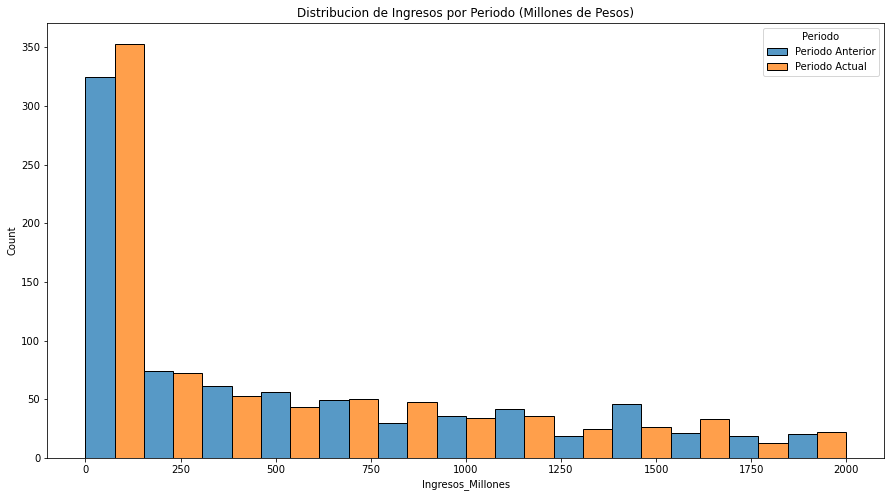

In [154]:
ERI_INGRESOS = pd.pivot_table(
    ERI,
    values='Ingresos_Millones',
   index=['Nit'],
    columns='Periodo',
)
plt.figure(figsize=(15,8))
#ERI_INGRESOS.plot.hist(bins=10,legend = True,subplots=True, figsize=(10,10))
sns.histplot(x='Ingresos_Millones', hue='Periodo',multiple="dodge", data=ERI[(ERI['Ingresos de actividades ordinarias']<=2000000)]).set_title('Distribucion de Ingresos por Periodo (Millones de Pesos)')

**Descriptiva Variables Más Importantes ERI (Estado de Resultado Integral) - Periodo Actual.**

In [155]:
ESF[['Total de activos','Total pasivos','Patrimonio total']][ESF['Nit'].isin(empresas)].describe().style.format('${0:,.0f}')

,Total de activos,Total pasivos,Patrimonio total
count,"$1,616","$1,616","$1,616"
mean,"$30,136,001","$8,634,821","$21,501,180"
std,"$60,506,389","$24,611,238","$59,501,396"
min,$0,$0,"$-482,864,075"
25%,"$7,671,406","$883,786","$3,062,380"
50%,"$14,181,904","$2,877,932","$9,020,314"
75%,"$30,998,676","$7,690,434","$20,605,588"
max,"$1,033,557,589","$497,452,811","$1,010,384,232"


**Descriptiva Variables Más Importantes ERI (Estado de Resultado Integral) - Periodo anterior.**

In [156]:
ESF[['Total de activos','Total pasivos','Patrimonio total']][ESF['Nit'].isin(empresas)].describe().style.format('${0:,.0f}')

,Total de activos,Total pasivos,Patrimonio total
count,"$1,616","$1,616","$1,616"
mean,"$30,136,001","$8,634,821","$21,501,180"
std,"$60,506,389","$24,611,238","$59,501,396"
min,$0,$0,"$-482,864,075"
25%,"$7,671,406","$883,786","$3,062,380"
50%,"$14,181,904","$2,877,932","$9,020,314"
75%,"$30,998,676","$7,690,434","$20,605,588"
max,"$1,033,557,589","$497,452,811","$1,010,384,232"


**Descriptiva Sectorial Actividad Especifica - Informacion General.**

In [157]:
Caratula['Clasificación Industrial Internacional Uniforme Versión 4 A.C'].unique().shape

(226,)

**Asignación de Macrosectores según Descriptiva de actividad y Análisis de Distribución.**

In [158]:
Macrosectores = {
    'G4774 - Comercio al por menor de otros productos nuevos en establecimientos especializados':'Comercio',
    'F4390 - Otras actividades especializadas para la construcción de edificios y obras de ingeniería civil':'Construcción',
    'M7490 - Otras actividades profesionales, científicas y técnicas n.c.p.':'Industria',
    'F4111 - Construcción de edificios residenciales':'Construcción',
    'I5629 - Actividades de otros servicios de comidas':'Otras actividades',
    'G4511 - Comercio de vehículos automotores nuevos':'Comercio',
    'K6499 - Otras actividades de servicio financiero, excepto las de seguros y pensiones n.c.p.':'Actividades financieras',
    'C2029 - Fabricación de otros productos químicos n.c.p.':'Otras actividades',
    'L6810 - Actividades inmobiliarias realizadas con bienes propios o arrendados':'Actividades inmobiliarias',
    'C2394 - Fabricación de cemento, cal y yeso':'Construcción',
    'A0126 - Cultivo de palma para aceite (palma africana) y otros frutos oleaginosos':'Agropecuario',
    'L6820 - Actividades inmobiliarias realizadas a cambio de una retribución o por contrata':'Actividades inmobiliarias',
    'B0811 - Extracción de piedra, arena, arcillas comunes, yeso y anhidrita':'Industria',
    'A0210 - Silvicultura y otras actividades forestales':'Agropecuario',
    'N8299 - Otras actividades de servicio de apoyo a las empresas n.c.p.':'Otras actividades',
    'F4290 - Construcción de otras obras de ingeniería civil':'Comercio',
    'Q8610 - Actividades de hospitales y clínicas, con internación':'Otras actividades',
    'F4112 - Construcción de edificios no residenciales':'Construcción',
    'K6613 - Otras actividades relacionadas con el mercado de valores':'Actividades financieras',
    'G4771 - Comercio al por menor de prendas de vestir y sus accesorios (incluye artículos de piel) en establecimientos especializados':'Comercio',
    'C2100 - Fabricación de productos farmacéuticos, sustancias químicas medicinales y productos botánicos de uso farmacéutico':'Industria',
    'S9603 - Pompas fúnebres y actividades relacionadas':'Otras actividades',
    'M7010 - Actividades de administración empresarial':'Otras actividades',
    'G4664 - Comercio al por mayor de productos químicos básicos, cauchos y plásticos en formas primarias y productos químicos de uso agropecuario':'Comercio',
    'I5611 - Expendio a la mesa de comidas preparadas':'Comercio',
    'C1921 - Fabricación de productos de la refinación del petróleo':'Industria',
    'G4651 - Comercio al por mayor de computadores, equipo periférico y programas de informática':'Comercio',
    'C2395 - Fabricación de artículos de hormigón, cemento y yeso':'Industria',
    'C2392 - Fabricación de materiales de arcilla para la construcción':'Industria',
    'C1410 - Confección de prendas de vestir, excepto prendas de piel':'Industria',
    'G4669 - Comercio al por mayor de otros productos n.c.p.':'Comercio',
    'C1030 - Elaboración de aceites y grasas de origen vegetal y animal':'Industria',
    'M7110 - Actividades de arquitectura e ingeniería y otras actividades conexas de consultoría técnica':'Industria',
    'K6494 - Otras actividades de distribución de fondos':'Otras actividades',
    'C2221 - Fabricación de formas básicas de plástico':'Industria',
    'P8551 - Formación académica no formal':'Otras actividades',
    'F4329 - Otras instalaciones especializadas':'Otras actividades',
    'M7020 - Actividades de consultaría de gestión':'Actividades profesionales y administrativas',
    'F4210 - Construcción de carreteras y vías de ferrocarril':'Construcción',
    'J6399 - Otras actividades de servicio de información n.c.p.':'Actividades profesionales y administrativas',
    'G4541 - Comercio de motocicletas y de sus partes, piezas y accesorios':'Comercio',
    'N7810 - Actividades de agencias de empleo':'Actividades profesionales y administrativas',
    'A0141 - Cría de ganado bovino y bufalino':'Agropecuario',
    'G4642 - Comercio al por mayor de prendas de vestir':'Comercio',
    'C1313 - Acabado de productos textiles':'Industria',
    'H5229 - Otras actividades complementarias al transporte':'Otras actividades',
    'J6311 - Procesamiento de datos, alojamiento (hosting) y actividades relacionadas':'Actividades profesionales y administrativas',
    'C1051 - Elaboración de productos de molinería':'Industria',
    'C1062 - Descafeinado, tostión y molienda del café':'Industria',
    'G4659 - Comercio al por mayor de otros tipos de maquinaria y equipo n.c.p.':'Comercio',
    'G4530 - Comercio de partes, piezas (autopartes) y accesorios (lujos) para vehículos automotores':'Comercio',
    'M7310 - Publicidad':'Comercio',
    'C2023 - Fabricación de jabones y detergentes, preparados para limpiar y pulir; perfumes y preparados de tocador':'Industria',
    'N7730 - Alquiler y arrendamiento de otros tipos de maquinaria, equipo y bienes tangibles n.c.p.':'Comercio',
    'K6611 - Administración de mercados financieros':'Actividades financieras',
    'A0322 - Acuicultura de agua dulce':'Agropecuario',
    'G4662 - Comercio al por mayor de metales y productos metalíferos':'Comercio',
    'F4220 - Construcción de proyectos de servicio público':'Construcción',
    'G4645 - Comercio al por mayor de productos farmacéuticos, medicinales, cosméticos y de tocador':'Comercio',
    'C1011 - Procesamiento y conservación de carne y productos cárnicos':'Industria',
    'C2212 - Reencauche de llantas usadas':'Industria',
    'A0145 - Cría de aves de corral':'Agropecuario',
    'G4620 - Comercio al por mayor de materias primas agropecuarias; animales vivos':'Comercio',
    'G4731 - Comercio al por menor de combustible para automotores':'Comercio',
    'B0910 - Actividades de apoyo para la extracción de petróleo y de gas natural':'Minería',
    'G4690 - Comercio al por mayor no especializado':'Comercio',
    'C3110 - Fabricación de muebles':'Industria',
    'C2229 - Fabricación de artículos de plástico n.c.p.':'Industria',
    'J6202 - Actividades de consultoría informática y actividades de administración de instalaciones informáticas':'Actividades profesionales y administrativas',
    'C2599 - Fabricación de otros productos elaborados de metal n.c.p.':'Industria',
    'G4661 - Comercio al por mayor de combustibles sólidos, líquidos, gaseosos y productos conexos':'Comercio',
    'N8220 - Actividades de centros de llamadas (Call center)':'Información y comunicaciones',
    'F4321 - Instalaciones eléctricas':'Electricidad, gas y agua',
    'N8211 - Actividades combinadas de servicios administrativos de oficina':'Actividades profesionales y administrativas',
    'A0121 - Cultivo de frutas tropicales y subtropicales':'Agropecuario',
    'A0124 - Cultivo de caña de azúcar':'Agropecuario',
    'B0990 - Actividades de apoyo para otras actividades de explotación de minas y canteras':'Minería',
    'R9329 - Otras actividades recreativas y de esparcimiento n.c.p.':'Otras actividades',
    'M7120 - Ensayos y análisis técnicos':'Otras actividades',
    'G4663 - Comercio al por mayor de materiales de construcción, artículos de ferretería, pinturas, productos de vidrio, equipo y materiales de fontanería y calefacción':'Comercio',
    'D3511 - Generación de energía eléctrica':'Electricidad, gas y agua',
    'A0122 - Cultivo de plátano y banano':'Agropecuario',
    'N7710 - Alquiler y arrendamiento de vehículos automotores':'Actividades profesionales y administrativas',
    'K6619 - Otras actividades auxiliares de las actividades de servicios financieros n.c.p.':'Actividades financieras',
    'J5911 - Actividades de producción de películas cinematográficas, videos, programas, anuncios y comerciales de televisión':'Información y comunicaciones',
    'H4923 - Transporte de carga por carretera':'Otras actividades',
    'C2022 - Fabricación de pinturas, barnices y revestimientos similares, tintas para impresión y masillas':'Industria',
    'C2824 - Fabricación de maquinaria para explotación de minas y canteras y para obras de construcción':'Industria',
    'C1090 - Elaboración de alimentos preparados para animales':'Industria',
    'N8291 - Actividades de agencias de cobranza y oficinas de calificación crediticia':'Actividades financieras',
    'N7911 - Actividades de las agencias de viaje':'Actividades profesionales y administrativas',
    'C1312 - Tejeduría de productos textiles':'Industria',
    'C3290 - Otras industrias manufactureras n.c.p.':'Industria',
    'J5811 - Edición de libros':'Otras actividades',
    'C1709 - Fabricación de otros artículos de papel y cartón':'Industria',
    'A0144 - Cría de ganado porcino':'Agropecuario',
    'K6630 - Actividades de administración de fondos':'Actividades profesionales y administrativas',
    'N7820 - Actividades de agencias de empleo temporal':'Actividades profesionales y administrativas',
    'G4643 - Comercio al por mayor de calzado':'Comercio',
    'I5511 - Alojamiento en hoteles':'Actividades profesionales y administrativas',
    'C1812 - Actividades de servicios relacionados con la impresión':'Actividades profesionales y administrativas',
    'P8530 - Establecimientos que combinan diferentes niveles de educación':'Otras actividades',
    'N7830 - Otras actividades de suministro de recurso humano':'Otras actividades',
    'G4799 - Otros tipos de comercio al por menor no realizado en establecimientos, puestos de venta o mercados':'Comercio',
    'G4773 - Comercio al por menor de productos farmacéuticos y medicinales, cosméticos y artículos de tocador en establecimientos especializados':'Comercio',
    'G4719 - Comercio al por menor en establecimientos no especializados, con surtido compuesto principalmente por productos diferentes de alimentos (víveres en general), bebidas y tabaco':'Comercio',
    'C1081 - Elaboración de productos de panadería':'Otras actividades',
    'G4652 - Comercio al por mayor de equipo, partes y piezas electrónicos y de telecomunicaciones':'Comercio',
    'A0161 - Actividades de apoyo a la agricultura':'Otras actividades',
    'C2620 - Fabricación de computadoras y de equipo periférico':'Industria',
    'G4631 - Comercio al por mayor de productos alimenticios':'Comercio',
    'G4711 - Comercio al por menor en establecimientos no especializados con surtido compuesto principalmente por alimentos, bebidas o tabaco':'Comercio',
    'B0510 - Extracción de hulla (carbón de piedra)':'Minería',
    'C1040 - Elaboración de productos lácteos':'Industria',
    'J6201 - Actividades de desarrollo de sistemas informáticos (planificación, análisis, diseño, programación, pruebas)':'Actividades profesionales y administrativas',
    'S9512 - Mantenimiento y reparación de equipos de comunicación':'Actividades profesionales y administrativas',
    'M7410 - Actividades especializadas de diseño':'Actividades profesionales y administrativas',
    'E3821 - Tratamiento y disposición de desechos no peligrosos':'Otras actividades',
    'A0150 - Explotación mixta (agrícola y pecuaria)':'Agropecuario',
    'A0125 - Cultivo de flor de corte':'Agropecuario',
    'H5223 - Actividades de aeropuertos, servicios de navegación aérea y demás actividades conexas al transporte aéreo':'Actividades profesionales y administrativas',
    'R9007 - Actividades de espectáculos musicales en vivo':'Actividades profesionales y administrativas',
    'A0112 - Cultivo de arroz':'Agropecuario',
    'G4759 - Comercio al por menor de otros artículos domésticos en establecimientos especializados':'Comercio',
    'I5612 - Expendio por autoservicio de comidas preparadas':'Otras actividades',
    'G4752 - Comercio al por menor de artículos de ferretería, pinturas y productos de vidrio en establecimientos especializados':'Comercio',
    'J6120 - Actividades de telecomunicaciones inalámbricas':'Información y comunicaciones',
    'K6615 - Actividades de los profesionales de compra y venta de divisas':'Actividades financieras',
    'R9311 - Gestión de instalaciones deportivas':'Otras actividades',
    'D3514 - Comercialización de energía eléctrica':'Electricidad, gas y agua',
    'Q8691 - Actividades de apoyo diagnóstico':'Actividades profesionales y administrativas',
    'G4649 - Comercio al por mayor de otros utensilios domésticos n.c.p.':'Comercio',
    'G4741 - Comercio al por menor de computadores, equipos periféricos, programas de informática y equipos de telecomunicaciones en establecimientos especializados':'Comercio',
    'C2930 - Fabricación de partes, piezas (autopartes) y accesorios (lujos) para vehículos automotores':'Industria',
    'D3512 - Transmisión de energía eléctrica':'Electricidad, gas y agua',
    'M6920 - Actividades de contabilidad, teneduría de libros, auditoría financiera y asesoría tributaria':'Actividades financieras',
    'F4312 - Preparación del terreno':'Otras actividades',
    'Q8699 - Otras actividades de atención de la salud humana':'Otras actividades',
    'M6910 - Actividades jurídicas':'Otras actividades',
    'J6190 - Otras actividades de telecomunicaciones':'Información y comunicaciones',
    'C2011 - Fabricación de sustancias y productos químicos básicos':'Industria',
    'J6010 - Actividades de programación y transmisión en el servicio de radiodifusión sonora':'Actividades profesionales y administrativas',
    'N7990 - Otros servicios de reserva y actividades relacionadas':'Otras actividades',
    'C3011 - Construcción de barcos y de estructuras flotantes':'Industria',
    'C1061 - Trilla de café':'Agropecuario',
    'Q8621 - Actividades de la práctica médica, sin internación':'Otras actividades',
    'N8020 - Actividades de servicios de sistemas de seguridad':'Otras actividades',
    'K6493 - Actividades de compra de cartera o factoring':'Actividades financieras',
    'A0119 - Otros cultivos transitorios n.c.p.':'Agropecuario',
    'E3811 - Recolección de desechos no peligrosos':'Otras actividades',
    'C2712 - Fabricación de aparatos de distribución y control de la energía eléctrica':'Electricidad, gas y agua',
    'C1089 - Elaboración de otros productos alimenticios n.c.p.':'Industria',
    'P8523 - Educación media técnica y de formación laboral':'Otras actividades',
    'H5222 - Actividades de puertos y servicios complementarios para el transporte acuático':'Actividades profesionales y administrativas',
    'B0820 - Extracción de esmeraldas, piedras preciosas y semipreciosas':'Minería',
    'C2819 - Fabricación de otros tipos de maquinaria y equipo de uso general n.c.p.':'Industria',
    'J6209 - Otras actividades de tecnologías de información y actividades de servicios informáticos':'Actividades profesionales y administrativas',
    'G4632 - Comercio al por mayor de bebidas y tabaco':'Comercio',
    'C3312 - Mantenimiento y reparación especializado de maquinaria y equipo':'Actividades profesionales y administrativas',
    'C2813 - Fabricación de otras bombas, compresores, grifos y válvulas':'Industria',
    'M7320 - Estudios de mercado y realización de encuestas de opinión pública':'Otras actividades',
    'G4724 - Comercio al por menor de bebidas y productos del tabaco, en establecimientos especializados':'Comercio',
    'G4641 - Comercio al por mayor de productos textiles, productos confeccionados para uso doméstico':'Comercio',
    'J6110 - Actividades de telecomunicaciones alámbricas':'Información y comunicaciones',
    'G4772 - Comercio al por menor de todo tipo de calzado y artículos de cuero y sucedáneos del cuero en establecimientos especializados':'Comercio',
    'G4761 - Comercio al por menor de libros, periódicos, materiales y artículos de papelería y escritorio, en establecimientos especializados':'Comercio',
    'G4754 - Comercio al por menor de electrodomésticos y gasodomésticos de uso doméstico, muebles y equipos de iluminación':'Comercio',
    'N8230 - Organización de convenciones y eventos comerciales':'Otras actividades',
    'G4732 - Comercio al por menor de lubricantes (aceites, grasas), aditivos y productos de limpieza para vehículos automotores':'Comercio',
    'S9601 - Lavado y limpieza, incluso la limpieza en seco, de productos textiles y de piel':'Otras actividades',
    'C1690 - Fabricación de otros productos de madera; fabricación de artículos de corcho, cestería y espartería':'Industria',
    'G4610 - Comercio al por mayor a cambio de una retribución o por contrata':'Comercio',
    'C2720 - Fabricación de pilas, baterías y acumuladores eléctricos':'Industria',
    'C2030 - Fabricación de fibras sintéticas y artificiales':'Industria',
    'R9312 - Actividades de clubes deportivos':'Otras actividades',
    'F4330 - Terminación y acabado de edificios y obras de ingeniería civil':'Construcción',
    'J5813 - Edición de periódicos, revistas y otras publicaciones periódicas':'Información y comunicaciones',
    'H4921 - Transporte de pasajeros':'Otras actividades',
    'C2396 - Corte, tallado y acabado de la piedra':'Otras actividades',
    'S9499 - Actividades de otras asociaciones n.c.p.':'Otras actividades',
    'A0123 - Cultivo de café':'Agropecuario',
    'I5512 - Alojamiento en apartahoteles':'Actividades profesionales y administrativas',
    'B0610 - Extracción de petróleo crudo':'Minería',
    'C2511 - Fabricación de productos metálicos para uso estructural':'Industria',
    'C1811 - Actividades de impresión':'Otras actividades',
    'F4311 - Demolición':'Otras actividades',
    'G4751 - Comercio al por menor de productos textiles en establecimientos especializados':'Comercio',
    'K6629 - Evaluación de riesgos y daños, y otras actividades de servicios auxiliares':'Actividades profesionales y administrativas',
    'G4791 - Comercio al por menor realizado a través de internet':'Comercio',
    'A0162 - Actividades de apoyo a la ganadería':'Otras actividades',
    'R9101 - Actividades de bibliotecas y archivos':'Otras actividades',
    'H5320 - Actividades de mensajería':'Otras actividades',
    'C1610 - Aserrado, acepillado e impregnación de la madera':'Otras actividades',
    'R9319 - Otras actividades deportivas':'Otras actividades',
    'K6513 - Reaseguros':'Actividades financieras',
    'C1311 - Preparación e hilatura de fibras textiles':'Industria',
    'C1102 - Elaboración de bebidas fermentadas no destiladas':'Industria',
    'C3314 - Mantenimiento y reparación especializado de equipo eléctrico':'Actividades profesionales y administrativas',
    'H5022 - Transporte fluvial de carga':'Otras actividades',
    'C2711 - Fabricación de motores, generadores y transformadores eléctricos':'Industria',
    'A0312 - Pesca de agua dulce':'Agropecuario',
    'J6130 - Actividades de telecomunicación satelital':'Información y comunicaciones',
    'E3900 - Actividades de saneamiento ambiental y otros servicios de gestión de desechos':'Otras actividades',
    'O8430 - Actividades de planes de seguridad social de afiliación obligatoria':'Otras actividades',
    'C2012 - Fabricación de abonos y compuestos inorgánicos nitrogenados':'Industria',
    'G4762 - Comercio al por menor de artículos deportivos, en establecimientos especializados':'Comercio',
    'C1521 - Fabricación de calzado de cuero y piel, con cualquier tipo de suela':'Industria',
    'S9511 - Mantenimiento y reparación de computadores y de equipo periférico':'Actividades profesionales y administrativas',
    'C3120 - Fabricación de colchones y somieres':'Industria',
    'C2219 - Fabricación de formas básicas de caucho y otros productos de caucho n.c.p.':'Industria',
    'C1020 - Procesamiento y conservación de frutas, legumbres, hortalizas y tubérculos':'Industria',
    'J5912 - Actividades de posproducción de películas cinematográficas, videos, programas, anuncios y comerciales de televisión':'Información y comunicaciones',
    'C1084 - Elaboración de comidas y platos preparados':'Otras actividades',
    'J5820 - Edición de programas de informática (software)':'Actividades profesionales y administrativas',
    'C1522 - Fabricación de otros tipos de calzado, excepto calzado de cuero y piel':'Industria',
    'I5621 - Catering para eventos':'Otras actividades',
    'B0710 - Extracción de minerales de hierro':'Minería',
    'H5221 - Actividades de estaciones, vías y servicios complementarios para el transporte terrestre':'Otras actividades',
    'A0130 - Propagación de plantas (actividades de los viveros, excepto viveros forestales)':'Otras actividades',
    'B0722 - Extracción de oro y otros metales preciosos':'Minería',
    'A0149 - Cría de otros animales n.c.p.':'Agropecuario',
    'N8121 - Limpieza general interior de edificios':'Otras actividades',
    'H5224 - Manipulación de carga':'Otras actividades',
    'N8130 - Actividades de paisajismo y servicios de mantenimiento conexos':'Otras actividades',
    'C2829 - Fabricación de otros tipos de maquinaria y equipo de uso especial n.c.p.':'Industria',
    'G4781 - Comercio al por menor de alimentos, bebidas y tabaco, en puestos de venta móviles':'Comercio',
    
    
}

<AxesSubplot:title={'center':'Distribucion de Sectores'}, xlabel='Macrosector'>

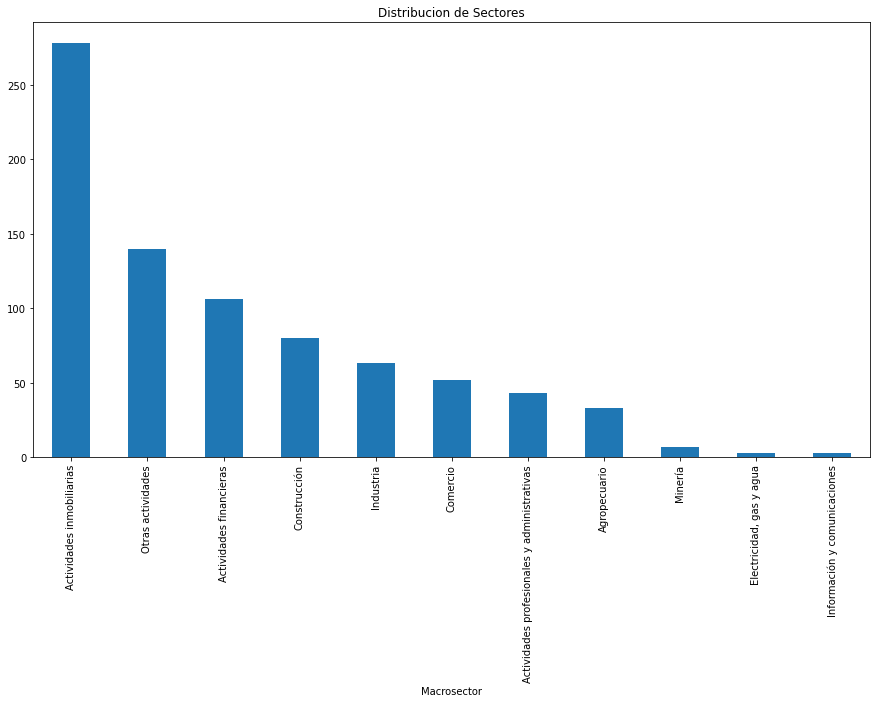

In [159]:
Caratula['Macrosector'] = Caratula['Clasificación Industrial Internacional Uniforme Versión 4 A.C'].replace(Macrosectores)
sectores = pd.DataFrame(Caratula[Caratula['Nit'].isin(empresas)])
sectores = sectores[['Macrosector']].groupby('Macrosector').size().to_frame('count').sort_values(by = 'count', ascending = False)
sectores.plot.bar(legend = False, title= 'Distribucion de Sectores',figsize=(15,8))

Text(0.5, 1.0, 'Distribucion de Ingresos por Macrosectores (Millones de Pesos)')

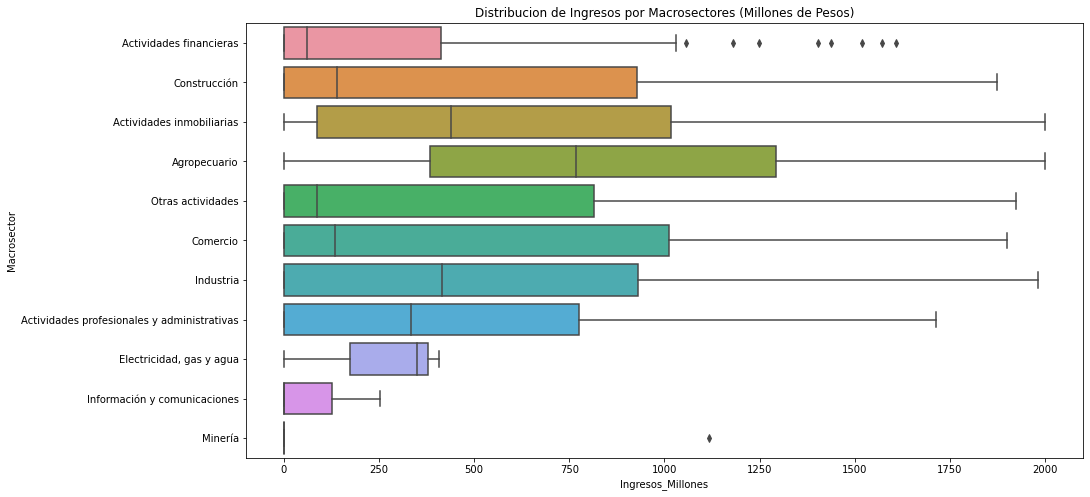

In [160]:
ERI2 = pd.merge(ERI, Caratula[["Nit",'Macrosector']], on="Nit")
plt.figure(figsize=(15,8))
sns.boxplot(x='Ingresos_Millones', y='Macrosector', orient="h", data=ERI2[(ERI2['Periodo']=='Periodo Actual')&(ERI2['Ingresos_Millones']<=2000)]).set_title('Distribucion de Ingresos por Macrosectores (Millones de Pesos)')

Text(0.5, 1.0, 'Distribucion de Activos por Macrosectores')

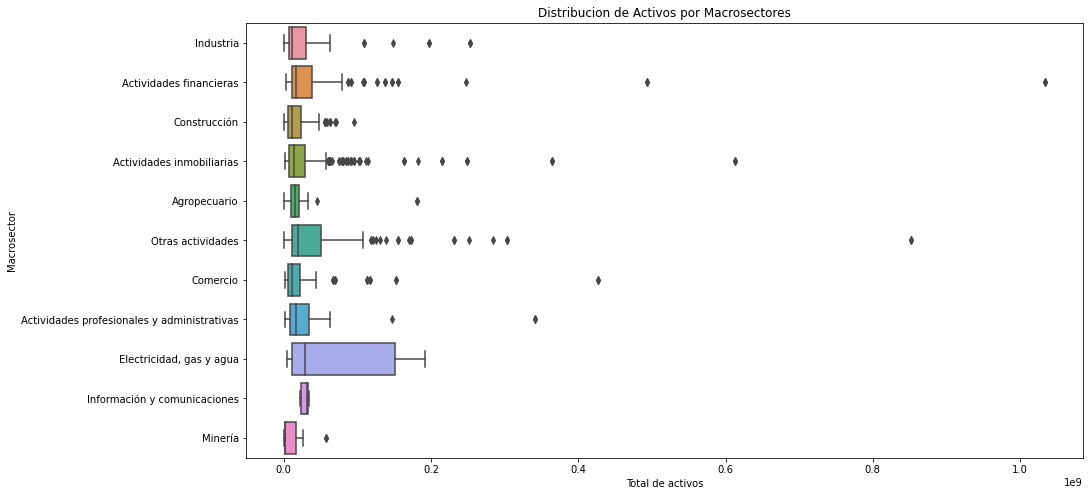

In [161]:
ESF = pd.merge(ESF,Caratula[["Nit",'Macrosector']], on="Nit")
ESF = pd.merge(ESF,ERI[["Nit",'Ingresos_Millones']], on="Nit")
plt.figure(figsize=(15,8))
sns.boxplot(x='Total de activos', y='Macrosector', orient="h", data=ESF[(ESF['Periodo']=='Periodo Actual')&(ESF['Ingresos_Millones']<=2000)]).set_title('Distribucion de Activos por Macrosectores')


Text(0.5, 1.0, 'Distribucion de Pasivos por Macrosectores')

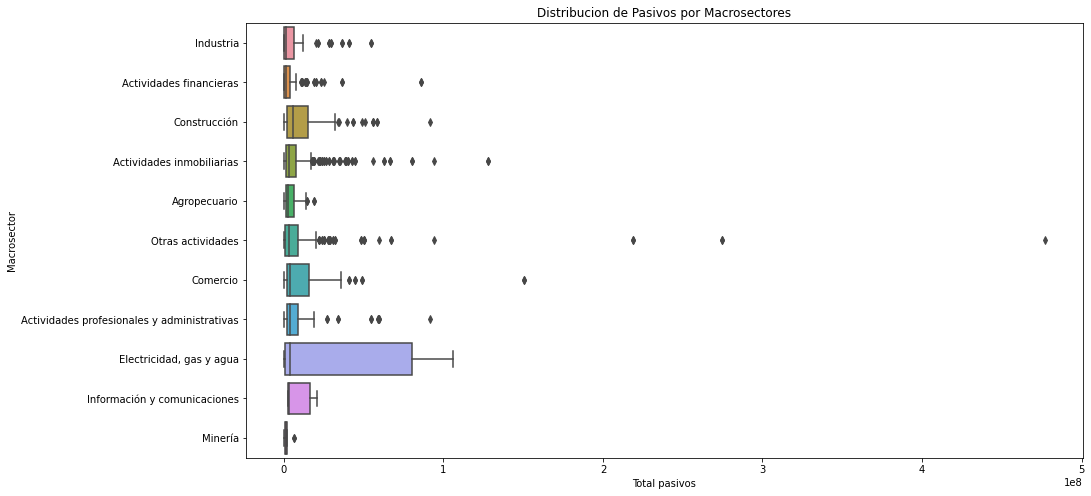

In [162]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total pasivos', y='Macrosector', orient="h", data=ESF[(ESF['Periodo']=='Periodo Actual')&(ESF['Ingresos_Millones']<=2000)]).set_title('Distribucion de Pasivos por Macrosectores')

pivot_sectores = 
plt.figure(figsize=(15, 3))
sns.heatmap(pivoted_df, cmap="coolwarm") # cmap defines the color palette

$$
r_{price,price} = 1\\
r_{price,bedrooms} = r_{bedrooms,price} = 0.454539
$$

### Construcción y Análisis de Indicadores Básicos

In [163]:
ERI_ACTUAL = ERI[ERI['Periodo']=='Periodo Actual']
ESF_ACTUAL = ESF[ESF['Periodo']=='Periodo Actual']
EFE_ACTUAL = EFE[EFE['Periodo']=='Periodo Actual']
ORI_ACTUAL = ORI[ORI['Periodo']=='Periodo Actual']
pd.set_option('display.float_format', '{:.2f}'.format)
ERI_ACTUAL = pd.merge(ERI_ACTUAL,ESF_ACTUAL,on='Nit')
ERI_ACTUAL = pd.merge(ERI_ACTUAL,EFE_ACTUAL,on='Nit')
ERI_ACTUAL['EBITDA'] = ERI_ACTUAL['Ganancia (pérdida), antes de impuestos'] + ERI_ACTUAL['(+/-) Ajustes por gastos por impuestos a las ganancias'] + ERI_ACTUAL['( + ) Ajustes por gastos de depreciación y amortización'] + ERI_ACTUAL['(+) Ajustes por costos financieros']
ERI_ACTUAL['GASTOS_FINANCIEROS'] = ERI_ACTUAL['Costos financieros'] 
ERI_ACTUAL['CAPITALTRABAJO'] = ERI_ACTUAL['Efectivo y equivalentes al efectivo']+ERI_ACTUAL['Cuentas comerciales por cobrar y otras cuentas por cobrar corrientes'] +ERI_ACTUAL['Inventarios corrientes']  -ERI_ACTUAL['Cuentas por pagar comerciales y otras cuentas por pagar']  
ERI_ACTUAL.head()

,Codigo Instancia_x,Nit,Fecha Corte_x,Punto Entrada_x,Estado Verificación_x,Periodo_x,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,Gastos de administración,Otros gastos,Otras ganancias (pérdidas),Ganancia (pérdida) por actividades de operación,Ingresos financieros,Costos financieros,"Participación en las ganancias (pérdidas) de subsidiarias, asociadas y negocios conjuntos que se contabilicen utilizando el método de la participación","Ganancia (pérdida), antes de impuestos",Ingreso (gasto) por impuestos,Ganancia (pérdida) procedente de operaciones continuadas,Ganancia (pérdida) procedente de operaciones discontinuadas,Ganancia (pérdida),Ingresos_Millones_x,Codigo Instancia_y,Fecha Corte_y,Punto Entrada_y,Periodo_y,Efectivo y equivalentes al efectivo,Cuentas comerciales por cobrar y otras cuentas por cobrar corrientes,Inventarios corrientes,"Activos por impuestos corrientes, corriente","Activos biológicos corrientes, al costo menos depreciación acumulada y deterioro de valor","Activos biológicos corrientes, al valor razonable",Otros activos financieros corrientes,Otros activos no financieros corrientes,Activos corrientes distintos al efectivo pignorados como garantía colateral para las que el receptor de transferencias tiene derecho por contrato o costumbre a vender o pignorar de nuevo dicha garantía colateral,Total activos corrientes distintos de los activos no corrientes o grupo de activos para su disposición clasificados como mantenidos para la venta o como mantenidos para distribuir a los propietarios,Activos no corrientes o grupos de activos para su disposición clasificados como mantenidos para la venta o como mantenidos para distribuir a los propietarios,Activos corrientes totales,"Propiedades, planta y equipo",Propiedades de inversión al costo menos depreciación acumulada y deterioro,Propiedades de inversión a valor razonable con cambios en resultados,Plusvalía,Activos intangibles distintos de la plusvalía,Inversiones en subsidiarias,Inversiones en asociadas,Inversiones en negocios conjuntos,"Activos biológicos no corrientes, al costo menos depreciación acumulada y deterioro del valor","Activos biológicos no corrientes, al valor razonable",Cuentas comerciales por cobrar y otras cuentas por cobrar no corrientes,Inventarios no corrientes,Activos por impuestos diferidos,"Activos por impuestos corrientes, no corriente",Otros activos financieros no corrientes,Otros activos no financieros no corrientes,Activos no corrientes distintos al efectivo pignorados como garantía colateral para las que el receptor de transferencias tiene derecho por contrato o costumbre a vender o pignorar de nuevo dicha garantía colateral,Total de activos no corrientes,Total de activos,Provisiones corrientes por beneficios a los empleados,Otras provisiones corrientes,Total provisiones corrientes,Cuentas por pagar comerciales y otras cuentas por pagar,"Pasivos por impuestos corrientes, corriente",Otros pasivos financieros corrientes,Préstamos corrientes,Parte corriente de préstamos no corrientes,Otros pasivos no financieros corrientes,Total pasivos corrientes distintos de los pasivos incluidos en grupos de activos para su disposición clasificados como mantenidos para la venta,Pasivos incluidos en grupos de activos para su disposición clasificados como mantenidos para la venta,Pasivos corrientes totales,Provisiones no corrientes por beneficios a los empleados,Otras provisiones no corrientes,Total provisiones no corrientes,Cuentas comerciales por pagar y otras cuentas por pagar no corrientes,Pasivo por impuestos diferidos,"Pasivos por impuestos corrientes, no corriente",Otros pasivos financieros no corrientes,Parte no corriente de préstamos no corrientes,Otros pasivos no financieros no corrientes,Total de pasivos no corrientes,Total pasivos,Capital emitido,Prima de emisión,Acciones propias en cartera,Inversión suplementaria al capital asignado,Otras participaciones en el patrimonio,Superavit por revaluac

In [164]:
ERI_ACTUAL['PASIVOS/UTOP'] =  ERI_ACTUAL['Total pasivos']/ERI_ACTUAL['Ganancia (pérdida) por actividades de operación']
ERI_ACTUAL['PATRIMONIO/ACTIVOS'] = ERI_ACTUAL['Patrimonio total']/ERI_ACTUAL['Total de activos']
ERI_ACTUAL['PASIVOS/PATRIMONIO'] = ERI_ACTUAL['Total pasivos'] / ERI_ACTUAL['Patrimonio total'] 
ERI_ACTUAL['PASIVOS/INGRESOS']= ERI_ACTUAL['Total pasivos'] /ERI_ACTUAL['Ingresos de actividades ordinarias']
ERI_ACTUAL['PASIVOS/ACTIVOS'] = ERI_ACTUAL['Total pasivos']/ERI_ACTUAL['Total de activos']
ERI_ACTUAL['PASIVOS/EBITDA'] = ERI_ACTUAL['Total pasivos']/ERI_ACTUAL['EBITDA']
ERI_ACTUAL['GTOSFINANCIEROS/EBITDA'] =  ERI_ACTUAL['GASTOS_FINANCIEROS'] /ERI_ACTUAL['EBITDA']
ERI_ACTUAL['ACTIVOSFIJOS/ACTIVOS'] =  ERI_ACTUAL['Propiedades, planta y equipo']  / ERI_ACTUAL['Total de activos']
ERI_ACTUAL['KT/ACTIVOS'] = ERI_ACTUAL['CAPITALTRABAJO'] / ERI_ACTUAL['Total de activos']
ERI_ACTUAL['PRUEBA/ACIDA'] = (ERI_ACTUAL['Activos corrientes totales']- ERI_ACTUAL['Inventarios corrientes'])/ ERI_ACTUAL['Pasivos corrientes totales']
ERI_ACTUAL.replace([np.inf, -np.inf], 0, inplace=True)
ERI_ACTUAL.head()

,Codigo Instancia_x,Nit,Fecha Corte_x,Punto Entrada_x,Estado Verificación_x,Periodo_x,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,Gastos de administración,Otros gastos,Otras ganancias (pérdidas),Ganancia (pérdida) por actividades de operación,Ingresos financieros,Costos financieros,"Participación en las ganancias (pérdidas) de subsidiarias, asociadas y negocios conjuntos que se contabilicen utilizando el método de la participación","Ganancia (pérdida), antes de impuestos",Ingreso (gasto) por impuestos,Ganancia (pérdida) procedente de operaciones continuadas,Ganancia (pérdida) procedente de operaciones discontinuadas,Ganancia (pérdida),Ingresos_Millones_x,Codigo Instancia_y,Fecha Corte_y,Punto Entrada_y,Periodo_y,Efectivo y equivalentes al efectivo,Cuentas comerciales por cobrar y otras cuentas por cobrar corrientes,Inventarios corrientes,"Activos por impuestos corrientes, corriente","Activos biológicos corrientes, al costo menos depreciación acumulada y deterioro de valor","Activos biológicos corrientes, al valor razonable",Otros activos financieros corrientes,Otros activos no financieros corrientes,Activos corrientes distintos al efectivo pignorados como garantía colateral para las que el receptor de transferencias tiene derecho por contrato o costumbre a vender o pignorar de nuevo dicha garantía colateral,Total activos corrientes distintos de los activos no corrientes o grupo de activos para su disposición clasificados como mantenidos para la venta o como mantenidos para distribuir a los propietarios,Activos no corrientes o grupos de activos para su disposición clasificados como mantenidos para la venta o como mantenidos para distribuir a los propietarios,Activos corrientes totales,"Propiedades, planta y equipo",Propiedades de inversión al costo menos depreciación acumulada y deterioro,Propiedades de inversión a valor razonable con cambios en resultados,Plusvalía,Activos intangibles distintos de la plusvalía,Inversiones en subsidiarias,Inversiones en asociadas,Inversiones en negocios conjuntos,"Activos biológicos no corrientes, al costo menos depreciación acumulada y deterioro del valor","Activos biológicos no corrientes, al valor razonable",Cuentas comerciales por cobrar y otras cuentas por cobrar no corrientes,Inventarios no corrientes,Activos por impuestos diferidos,"Activos por impuestos corrientes, no corriente",Otros activos financieros no corrientes,Otros activos no financieros no corrientes,Activos no corrientes distintos al efectivo pignorados como garantía colateral para las que el receptor de transferencias tiene derecho por contrato o costumbre a vender o pignorar de nuevo dicha garantía colateral,Total de activos no corrientes,Total de activos,Provisiones corrientes por beneficios a los empleados,Otras provisiones corrientes,Total provisiones corrientes,Cuentas por pagar comerciales y otras cuentas por pagar,"Pasivos por impuestos corrientes, corriente",Otros pasivos financieros corrientes,Préstamos corrientes,Parte corriente de préstamos no corrientes,Otros pasivos no financieros corrientes,Total pasivos corrientes distintos de los pasivos incluidos en grupos de activos para su disposición clasificados como mantenidos para la venta,Pasivos incluidos en grupos de activos para su disposición clasificados como mantenidos para la venta,Pasivos corrientes totales,Provisiones no corrientes por beneficios a los empleados,Otras provisiones no corrientes,Total provisiones no corrientes,Cuentas comerciales por pagar y otras cuentas por pagar no corrientes,Pasivo por impuestos diferidos,"Pasivos por impuestos corrientes, no corriente",Otros pasivos financieros no corrientes,Parte no corriente de préstamos no corrientes,Otros pasivos no financieros no corrientes,Total de pasivos no corrientes,Total pasivos,Capital emitido,Prima de emisión,Acciones propias en cartera,Inversión suplementaria al capital asignado,Otras participaciones en el patrimonio,Superavit por revaluac

***Distribucion Individual Indicadores Básicos.***

In [165]:
sectores2 = {
    'Construcción':'Construcción' ,
    'Agropecuario': 'Agropecuario',
    'Minería': 'Otros',
    'Industria': 'Otros',
    'Electricidad, gas y agua': 'Otros',
    'Comercio': 'Otros',
    'Información y comunicaciones': 'Otros',
    'Actividades financieras': 'Otros',
    'Actividades inmobiliarias': 'Otros',
    'Actividades profesionales y administrativas': 'Otros',
    'Administración pública': 'Otros',
    'Otras actividades': 'Otros',
            }
ERI_ACTUAL['Macrosector2'] = ERI_ACTUAL['Macrosector'].replace(sectores2)

In [166]:
#g = sns.FacetGrid(ERI_ACTUAL[(ERI_ACTUAL['Ingresos de actividades ordinarias']<=2000000)], col="Macrosector2")
#g.map(sns.histplot, 'PASIVOS/UTOP')
#plt.xlim(-20,  50)

(-20.0, 50.0)

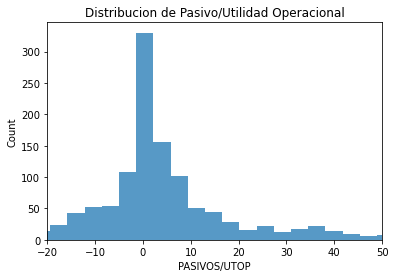

In [167]:
#fig, axes = plt.subplots(0, 3, figsize=(18, 10))
sns.histplot(x='PASIVOS/UTOP', data=ERI_ACTUAL[(ERI_ACTUAL['Ingresos de actividades ordinarias']<=2000000) ]).set_title('Distribucion de Pasivo/Utilidad Operacional')
plt.xlim(-20,  50)

(-1.0, 1.0)

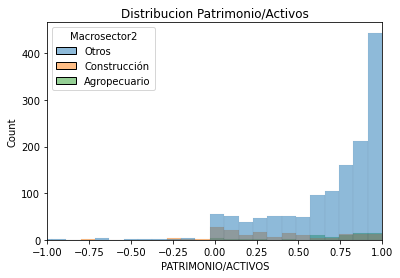

In [168]:
sns.histplot(x='PATRIMONIO/ACTIVOS',hue='Macrosector2',data=ERI_ACTUAL[(ERI_ACTUAL['Ingresos de actividades ordinarias']<=2000000)]).set_title('Distribucion Patrimonio/Activos')
plt.xlim(-1,  1)

(0.0, 3.0)

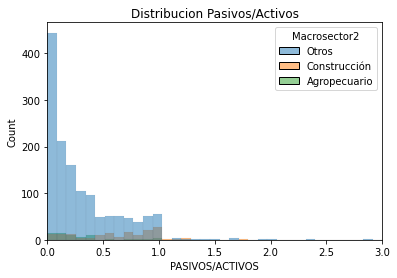

In [169]:
sns.histplot(x='PASIVOS/ACTIVOS', hue='Macrosector2', data=ERI_ACTUAL[(ERI_ACTUAL['Ingresos de actividades ordinarias']<=2000000)]).set_title('Distribucion Pasivos/Activos')
plt.xlim(0,  3)

(0.0, 5.0)

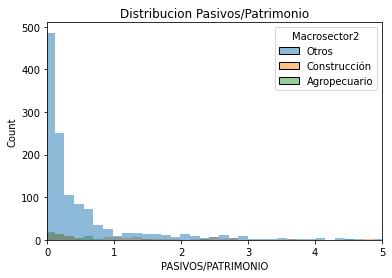

In [170]:
sns.histplot(x='PASIVOS/PATRIMONIO', hue='Macrosector2', data=ERI_ACTUAL[(ERI_ACTUAL['Ingresos de actividades ordinarias']<=2000000)]).set_title('Distribucion Pasivos/Patrimonio')
plt.xlim(0,  5)

(0.0, 30.0)

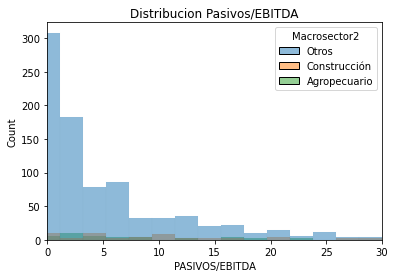

In [171]:
sns.histplot(x='PASIVOS/EBITDA', hue='Macrosector2', data=ERI_ACTUAL[(ERI_ACTUAL['Ingresos de actividades ordinarias']<=2000000)]).set_title('Distribucion Pasivos/EBITDA')
plt.xlim(0,  30)

Text(0.5, 1.0, 'Distribucion Activos Fijos/Activos')

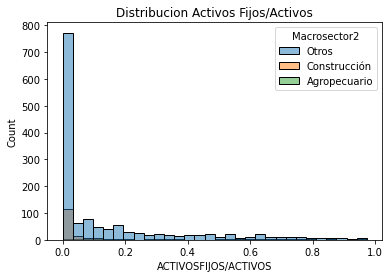

In [172]:
sns.histplot(x='ACTIVOSFIJOS/ACTIVOS', hue='Macrosector2', data=ERI_ACTUAL[(ERI_ACTUAL['Ingresos de actividades ordinarias']<=2000000)]).set_title('Distribucion Activos Fijos/Activos')

(-5.0, 10.0)

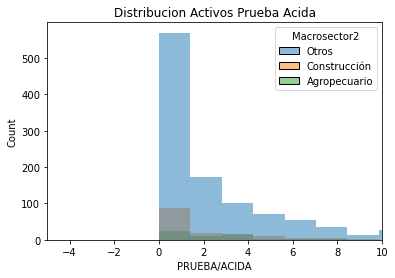

In [173]:
sns.histplot(x='PRUEBA/ACIDA', hue='Macrosector2', data=ERI_ACTUAL[(ERI_ACTUAL['Ingresos de actividades ordinarias']<=2000000)]).set_title('Distribucion Activos Prueba Acida')
plt.xlim(-5,  10)

***Análisis Correlaciones Indicadores Básicos.***

In [174]:
corr = ERI_ACTUAL[['PASIVOS/UTOP', 'PATRIMONIO/ACTIVOS','PASIVOS/PATRIMONIO','PASIVOS/INGRESOS','PASIVOS/ACTIVOS','PASIVOS/EBITDA','GTOSFINANCIEROS/EBITDA','ACTIVOSFIJOS/ACTIVOS','KT/ACTIVOS','PRUEBA/ACIDA']].corr()
corr

,PASIVOS/UTOP,PATRIMONIO/ACTIVOS,PASIVOS/PATRIMONIO,PASIVOS/INGRESOS,PASIVOS/ACTIVOS,PASIVOS/EBITDA,GTOSFINANCIEROS/EBITDA,ACTIVOSFIJOS/ACTIVOS,KT/ACTIVOS,PRUEBA/ACIDA
PASIVOS/UTOP,1.00,0.00,0.21,0.00,-0.00,0.19,0.00,0.02,0.00,-0.01
PATRIMONIO/ACTIVOS,0.00,1.00,-0.01,0.00,-1.00,-0.00,-0.00,0.03,0.78,0.01
PASIVOS/PATRIMONIO,0.21,-0.01,1.00,-0.00,0.01,-0.10,0.12,-0.04,0.00,-0.05
PASIVOS/INGRESOS,0.00,0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.01,0.00,-0.00
PASIVOS/ACTIVOS,-0.00,-1.00,0.01,-0.00,1.00,0.00,0.00,-0.03,-0.78,-0.01
PASIVOS/EBITDA,0.19,-0.00,-0.10,-0.00,0.00,1.00,0.32,0.00,0.01,-0.02
GTOSFINANCIEROS/EBITDA,0.00,-0.00,0.12,-0.00,0.00,0.32,1.00,0.01,0.00,-0.00
ACTIVOSFIJOS/ACTIVOS,0.02,0.03,-0.04,-0.01,-0.03,0.00,0.01,1.00,0.00,-0.04
KT/ACTIVOS,0.00,0.78,0.00,0.00,-0.78,0.01,0.00,0.00,1.00,-0.00
PRUEBA/ACIDA,-0.01,0.01,-0.05,-0.00,-0.01,-0.02,-0.00,-0.04,-0.00,1.00


<Figure size 2160x2160 with 0 Axes>

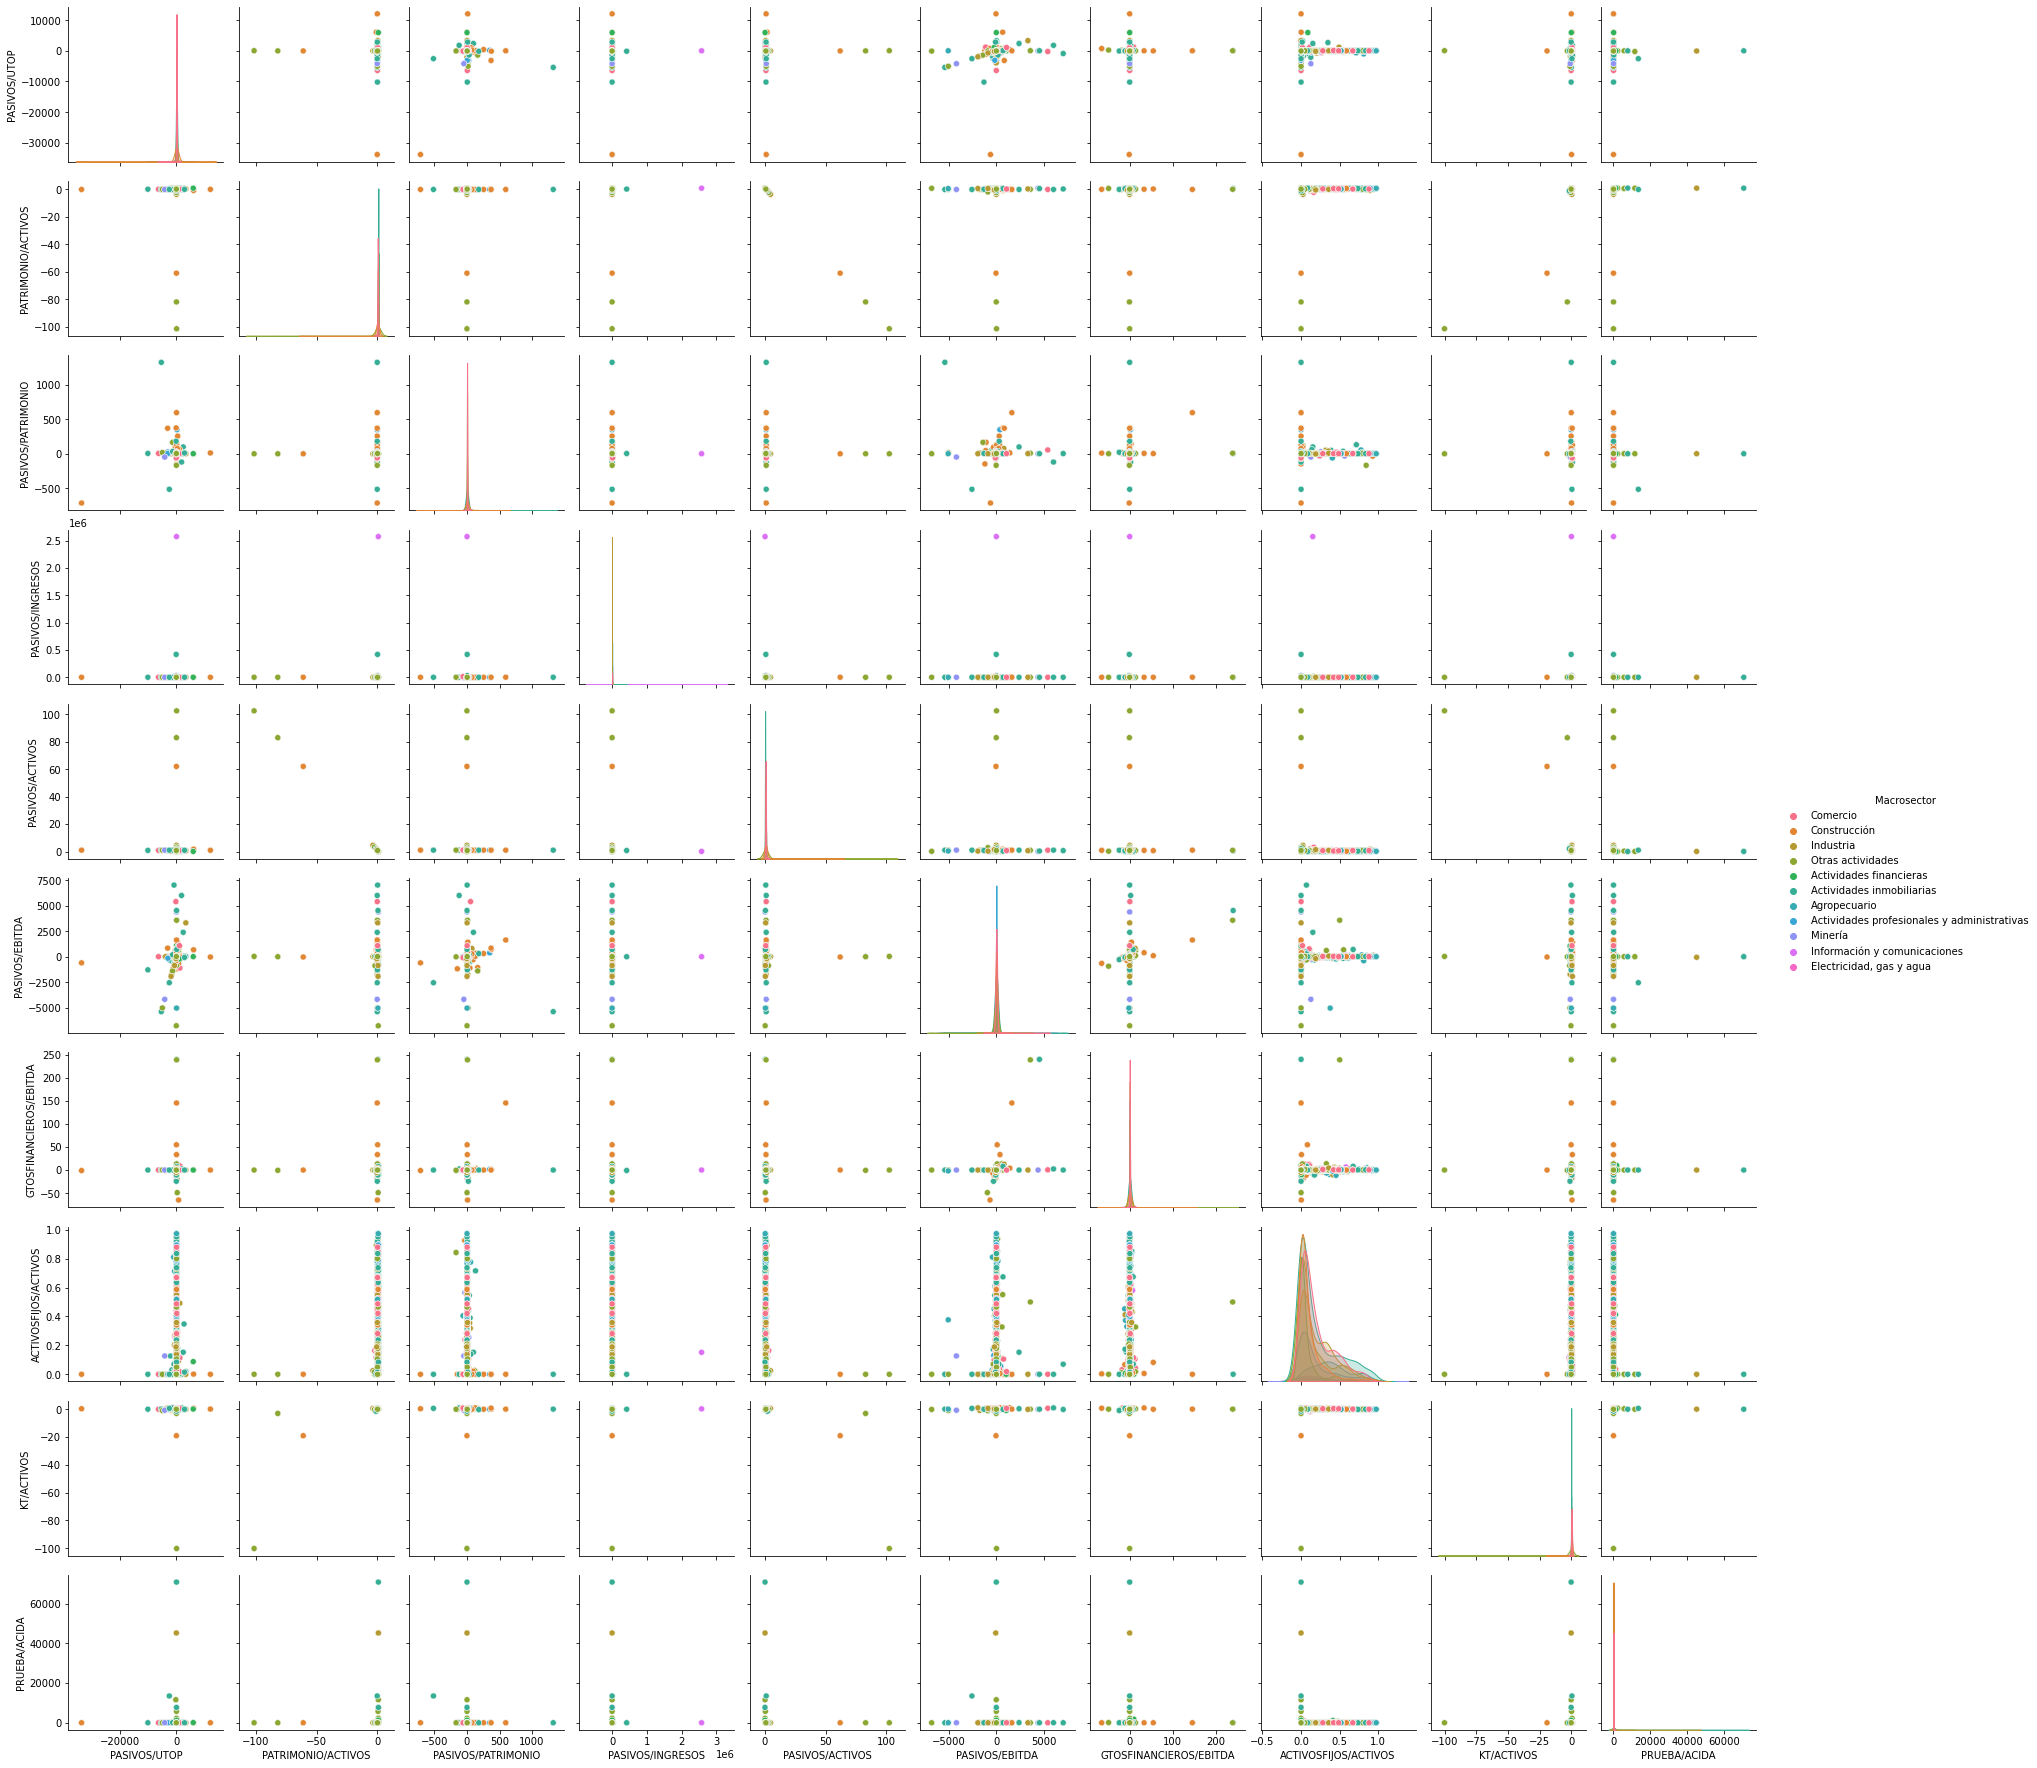

In [175]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(30,30))
sns.pairplot(vars=['PASIVOS/UTOP', 'PATRIMONIO/ACTIVOS','PASIVOS/PATRIMONIO','PASIVOS/INGRESOS','PASIVOS/ACTIVOS','PASIVOS/EBITDA','GTOSFINANCIEROS/EBITDA','ACTIVOSFIJOS/ACTIVOS','KT/ACTIVOS','PRUEBA/ACIDA'], data=ERI_ACTUAL, hue="Macrosector")

## Interpretación de Resultados:

De las anteriores descriptivas puede concluirse lo siguiente:

**Esta de Resultado Integral:** No ha habido un cambio significativo entre la distribución de ingresos del último año fiscal (2019) y el año anterior (2018). La media de ingresos está concentrada en los 504 MM mientras que la mediana está en 296 MM, por lo que la distribución de ingresos puede se asimétrica concentrada a la derecha.

**Estado de Situacion Financiera:**:

- En lo que respecta a la cuenta de Activos, la media se encuentra en los 3.489 MM, mostrando también sesgo a la derecha respecto a la mediana. Los valores mínimo y máximo se encuentran dentro de valores razonables.

- En cuando a Pasivos y Patrimonio, estos también se encuentran dentro de valores razonables. Es normal que ciertas empresas tengan un patrimonio negativo por lo que pueden estar en causal de disolución, sin embargo la descriptiva muestra que es menos del 25% de la muestra. En cuanto a los pasivos, no puede concluirse nada ya que estos deben compararse mediante una medida relativa.



**Distribución Sectorial:** En cuanto a sectores, la mayoría de empresas ejercen actividadesinmobiliarias. En general las principales actividades están recargadas hacia servicios y construcción.

## Ideas para el análisis estadístico:

En general las cifras paracen ser consistentes con lo que se espera, esto puede deberse a que este tipo de cifras son reportes oficiales obligatorios que exigen consistencia y auditados. 


In [176]:
pd.set_option('display.float_format', '{:.1f}%'.format)
Proy_Sectores = pd.read_excel ('D:/Maestría en Actuaría y Finanzas/Introduccion a la Ciencia de Datos/Proyecto Final/Proyeccion Crecimiento Sectores.xlsx')
Proy_Sectores

,RAMA,2019,2020,2021
0,Agropecuario,2.3%,2.8%,7.7%
1,Minería,1.7%,-15.7%,-2.1%
2,Industria,1.1%,-7.7%,5.4%
3,"Electricidad, gas y agua",2.5%,-2.6%,3.8%
4,Construcción,-1.8%,-27.7%,19.6%
5,Comercio,3.7%,-15.8%,9.0%
6,Información y comunicaciones,1.1%,-2.7%,3.0%
7,Actividades financieras,6.3%,2.1%,2.6%
8,Actividades inmobiliarias,3.3%,1.9%,2.8%
9,Actividades profesionales y administrativas,3.4%,-4.1%,2.9%
